In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# array([[1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1]], dtype=uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [11]:
# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# array([[0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0]], dtype=uint8)

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [12]:
# Cross-shaped Kernel
ex_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# array([[0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0]], dtype=uint8)
print(ex_kernel)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


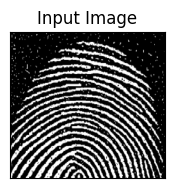

 Kernel 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [14]:
img_gray = plt.imread('HW_fingerprint.png')

# Convert RGB image to GrayScale image 
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)

## ============================= SHOW ============================ ##
plt.figure(figsize=(2,2))
# plt.subplot(221)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.show()

# kernel = np.ones((5,5),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print(' Kernel \n',kernel)

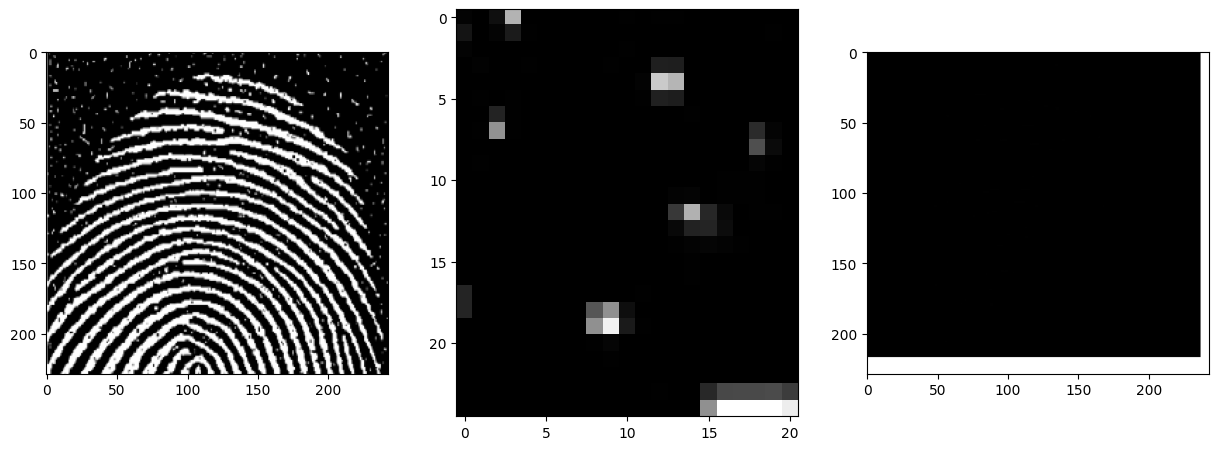

In [15]:
# input_image = np.array((
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 255, 255, 255, 0, 0, 0, 255],
#     [0, 255, 255, 255, 0, 0, 0, 0],
#     [0, 255, 255, 255, 0, 255, 0, 0],
#     [0, 0, 255, 0, 0, 0, 0, 0],
#     [0, 0, 255, 0, 0, 255, 255, 0],
#     [0,255, 0, 255, 0, 0, 255, 0],
#     [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
input_image = np.array(img_gray, dtype="uint8")

img_pattern = img_gray[5:30, 64:85]
# kernel = np.array((
#         [0, 1, 0],
#         [1, -1, 1],
#         [0, 1, 0]), dtype="int")
kernel = np.array(img_pattern, dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow( img_gray, cmap = 'gray')

plt.subplot(132)
plt.imshow( img_pattern, cmap = 'gray')

plt.subplot(133)
plt.imshow( output_image, cmap = 'gray')

plt.show()

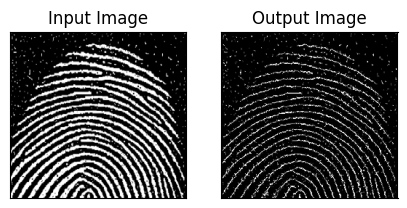

In [16]:
def skeletonize(img):
    """ OpenCV function to return a skeletonized version of img, a Mat object"""

    #  hat tip to http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/

    img = img.copy() # don't clobber original
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    while True:
        # ERODE
        eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
        # DILATE
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        # SUBTRACT ORG
        temp  = cv2.subtract(img, temp)
        # COMBINE RESULT
        skel = cv2.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
        if cv2.countNonZero(img) == 0:
            break

    return skel

skel = skeletonize(img_gray)

## ============================= SHOW ============================ ##
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( skel, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()


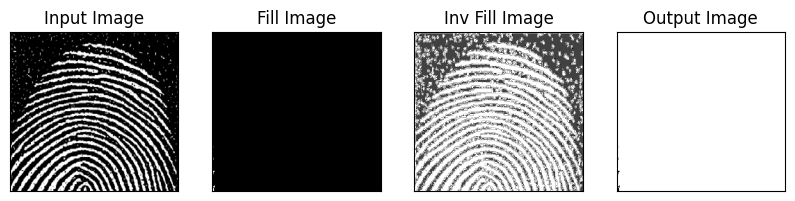

In [17]:
# Copy the thresholded image.
im_floodfill = img_gray.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = img_gray.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# cv2.floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]]) 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_fill_out = cv2.bitwise_or(img_gray,im_floodfill_inv)

## ============================= SHOW ============================ ##
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow( im_floodfill, cmap = 'gray')
plt.title('Fill Image'), plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow( im_floodfill_inv, cmap = 'gray')
plt.title('Inv Fill Image'), plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow( im_fill_out, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()